<a href="https://colab.research.google.com/github/jh-4166640/Machine-Learning-Lecture/blob/main/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import tensorflow as tf
#import tensorflow.keras as keras
import keras
import matplotlib.pyplot as plt
import keras.datasets.mnist as mnist
import keras.layers as layers

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# 최종 출력이 tanh이므로 -1~1로 bouding 시켜야 함
x_train = x_train/127.5 - 1
x_test = x_test/127.5 - 1

x_train = x_train.reshape(len(x_train),784)
x_test = x_test.reshape(len(x_test),784)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Generator**

In [ ]:
noise_dim = 100
batch_size = 64
iteration = 5000

#Vanilla Model
generator_input = keras.Input(shape = (noise_dim,))
g_hdn = (layers.Dense(256,activation = "relu"))(generator_input)
g_hdn = (layers.Dense(512,activation = "relu"))(g_hdn)
g_hdn = (layers.Dense(1024,activation = "relu"))(g_hdn)
generator_output = (layers.Dense(28*28,activation = "tanh"))(g_hdn)
# generator_output = (layers.Reshape((28,28,1)))(generator_output) Generator만 사용할 때 이미지로 변환 하기 위함

# functional API 사용
generator = keras.models.Model(generator_input, generator_output)
generator.summary()



SyntaxError: invalid syntax (ipython-input-3350155346.py, line 5)

**Discriminator**

In [ ]:
discriminator_input = keras.Input(shape=(784,))
d_hdn = layers.Dense(1024, activation='relu')(discriminator_input)
d_hdn = layers.Dropout(0.3)(d_hdn)
d_hdn = layers.Dense(512, activation='relu')(d_hdn)
d_hdn = layers.Dropout(0.3)(d_hdn)
d_hdn = layers.Dense(256, activation='relu')(d_hdn)
d_hdn = layers.Dropout(0.3)(d_hdn)
discriminator_output = layers.Dense(1, activation='sigmoid')(d_hdn)

discriminator = keras.models.Model(discriminator_input, discriminator_output)

discriminator.summary()

In [ ]:
discriminator.trainable = False # GAN 업데이트에서 Generator만 업데이트 되고 Discriminator는 업데이트 안되도록 함
discriminator.compile(loss = "binary_crossentropy", optimizer='adam')
gan_input = keras.Input(shape=(noise_dim,))
fake_img = generator(gan_input)
gan_output = discriminator(fake_img)

my_gan = keras.models.Model(gan_input, gan_output)
my_gan.compile(loss = "binary_crossentropy", optimizer='adam')
my_gan.summary()

In [ ]:
def train_discriminator(x_train):
  discriminator.trainable = True # D 학습 가능
  c = np.random.randint(0,x_train.shape[0],size = batch_size)
  real = x_train[c]
  discriminator.train_on_batch(real,np.ones((batch_size,1)))

  p=np.random.uniform(-1,1,size=(batch_size,noise_dim))
  fake = generator.predict(p)
  discriminator.train_on_batch(fake,np.zeros((batch_size,1)))

def train_generator():
  discriminator.trainable = False
  p=np.random.uniform(-1,1,size=(batch_size,noise_dim))
  my_gan.train_on_batch(p,np.ones((batch_size,1)))


In [ ]:
for i in range(iteration+1):
  train_discriminator(x_train)
  train_generator()
  if(i%500==0):
    plt.figure(figsize=(20,4))
    plt.suptitle('iter'+str(i))
    for k in range(20):
      plt.subplot(2,10,k+1)
      img = generator.predict(np.random.uniform(-1,1,size=(1,noise_dim)))
      plt.imshow(img.reshape(28,28),cmap='gray')
      plt.axis('off')
      plt.xticks([])
      plt.yticks([])
    plt.show()


In [ ]:
plt.figure(figsize=(26,12))
plt.suptitle('iter 5000')
for k in range(50):
    plt.subplot(5,10,k+1)
    img = generator.predict(np.random.uniform(-1,1,size=(1,noise_dim)))
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.axis('off')
plt.title(iter)
plt.show()

-----
***DCGAN***

**Generator**

In [14]:
noise_dim = 100
batch_size = 128
iteration = 4000

# DCGAN Model

generator = keras.Sequential([
    keras.layers.Input(shape=(noise_dim,)),
    keras.layers.Dense(7 * 7 * 256, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),
    keras.layers.Reshape((7, 7, 256)),

    keras.layers.Conv2DTranspose(128, (5,5), strides=2, padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),

    keras.layers.Conv2DTranspose(64, (5,5), strides=2, padding='same'),
    keras.layers.BatchNormalization(),
    keras.layers.ReLU(),

    keras.layers.Conv2DTranspose(1, (5,5), strides=1, padding='same', activation='tanh')
])


generator.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 12544)          │     1,254,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12544)          │        50,176 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_6 (ReLU)                  │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_6              │ (None, 14, 14, 128)    │       819,328 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_7 (ReLU)                  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 28, 28, 64)     │       204,864 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_8 (ReLU)                  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_8              │ (None, 28, 28, 1)      │         1,601 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,331,137 (8.89 MB)

 Trainable params: 2,305,665 (8.80 MB)

 Non-trainable params: 25,472 (99.50 KB)

**Discriminator**

In [15]:
discriminator = keras.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(64, (5, 5), strides=2, padding='same'),
    keras.layers.LeakyReLU(0.2),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(128, (5, 5), strides=2, padding='same'),
    keras.layers.LeakyReLU(0.2),
    keras.layers.Dropout(0.3),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid')
])

discriminator.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
def train_discriminator(x_train):
  discriminator.trainable = True # D 학습 가능
  c = np.random.randint(0,x_train.shape[0],size = batch_size)
  real = x_train[c]
  # label smoothing
  real_labels = np.ones((batch_size,1)) * 0.9
  discriminator.train_on_batch(real,real_labels)

  p=np.random.uniform(-1,1,size=(batch_size,noise_dim))
  fake = generator.predict(p)
  fake_labels = np.zeros((batch_size, 1))
  loss = discriminator.train_on_batch(fake,fake_labels)
  print("D_loss(fake):", loss)

def train_generator():
  discriminator.trainable = False
  p=np.random.uniform(-1,1,size=(batch_size,noise_dim))
  labels = np.ones((batch_size,1)) # label smoothing
  loss= my_dcgan.train_on_batch(p,labels)

  print("G_loss:", loss)

discriminator.trainable = False # GAN 업데이트에서 Generator만 업데이트 되고 Discriminator는 업데이트 안되도록 함

gan_input = keras.Input(shape=(noise_dim,))
fake_img = generator(gan_input)
gan_output = discriminator(fake_img)

my_dcgan = keras.models.Model(gan_input, gan_output)
my_dcgan.compile(loss = "binary_crossentropy",
                 optimizer=keras.optimizers.Adam(0.00025, beta_1 = 0.5))
discriminator.compile(loss = "binary_crossentropy", optimizer=keras.optimizers.Adam(0.0002, beta_1 = 0.5))
my_dcgan.summary()


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (None, 28, 28, 1)      │     2,331,137 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_6 (Sequential)       │ (None, 1)              │       212,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,544,002 (9.70 MB)

 Trainable params: 2,305,665 (8.80 MB)

 Non-trainable params: 238,337 (931.00 KB)

(60000, 28, 28, 1)
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step  
D_loss(fake): 0.7159505
G_loss: 0.6811697
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


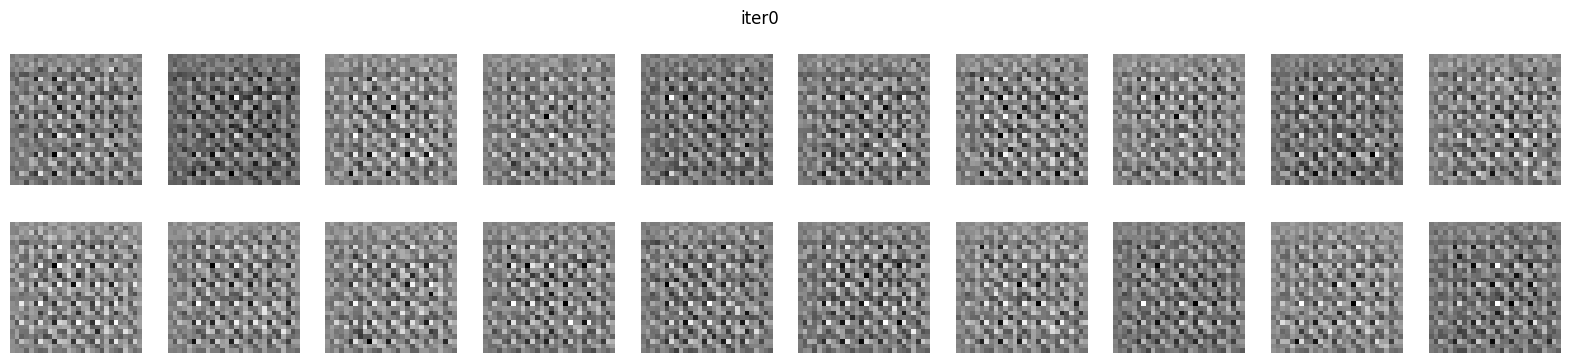

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.6848615
G_loss: 0.62326443
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.6592332
G_loss: 0.5749426
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.63802993
G_loss: 0.53535664
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.62034523
G_loss: 0.50357646
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.605838
G_loss: 0.47458237
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.5941762
G_loss: 0.45174018
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.5847685
G_loss: 0.43549287
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.57702196
G_loss: 0.42445534
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.5705474
G_loss: 0.41777593
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.5651387
G_loss: 0.40772378
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.560727
G_loss: 0.40213966
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.5567416
G_loss: 0.40248197
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 

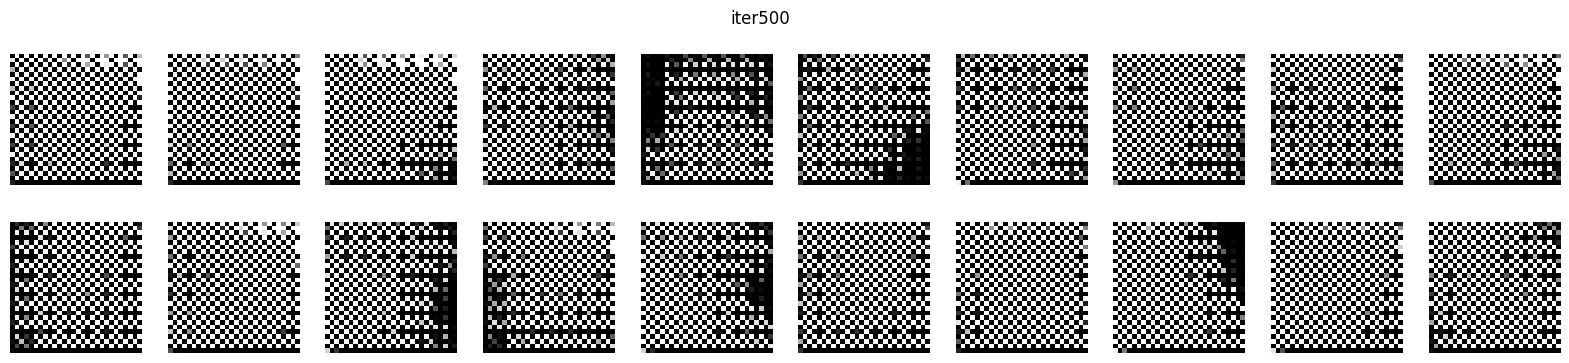

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.21189724
G_loss: 0.3081641
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.21186975
G_loss: 0.31468803
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.2118304
G_loss: 0.32132986
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.21182601
G_loss: 0.3288442
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.2118266
G_loss: 0.33765152
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.21183792
G_loss: 0.34610435
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.21179397
G_loss: 0.35548967
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.21175067
G_loss: 0.3655351
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.2117046
G_loss: 0.3746168
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.21164411
G_loss: 0.3836463
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.2115814
G_loss: 0.39236426
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.21152097
G_loss: 0.40036508
4/4 ━━━━━━━━━━━━━━━━━━━━ 

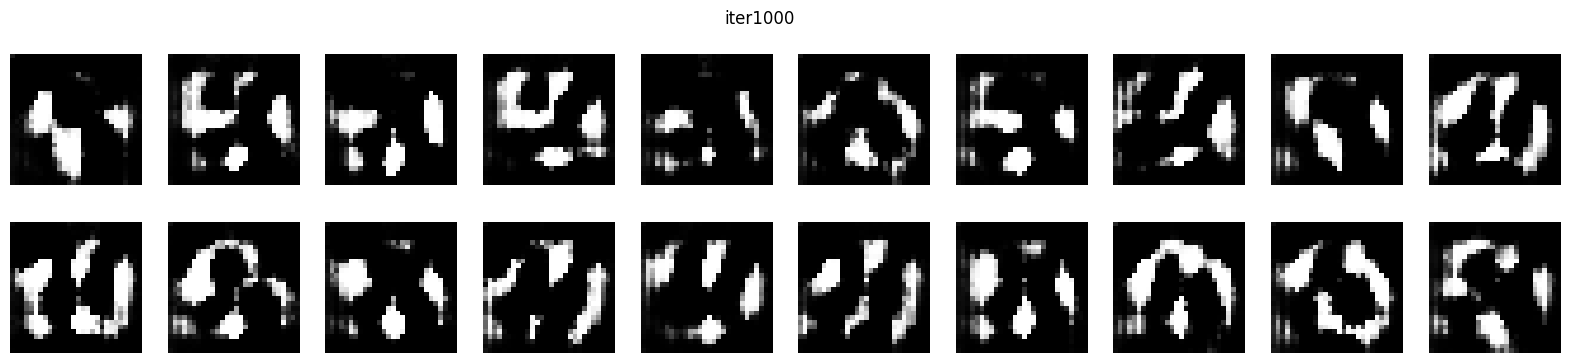

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.22785927
G_loss: 1.4102584
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.22790194
G_loss: 1.4089803
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.22801276
G_loss: 1.4077115
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.22805889
G_loss: 1.4064279
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.22810781
G_loss: 1.4051491
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.2281722
G_loss: 1.4038732
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.2282588
G_loss: 1.4026117
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.22835203
G_loss: 1.401342
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.22842371
G_loss: 1.4000882
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.22847164
G_loss: 1.3988428
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.22854492
G_loss: 1.3975757
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.22862703
G_loss: 1.3963317
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms

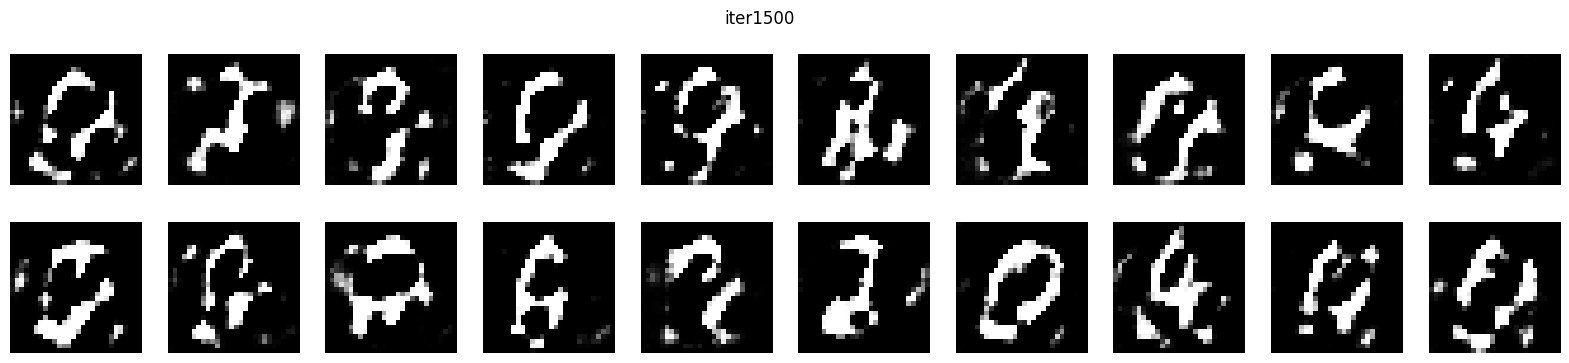

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.35532835
G_loss: 1.1711483
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.35557237
G_loss: 1.1709466
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.35577527
G_loss: 1.1707675
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.35590988
G_loss: 1.1706158
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.35606205
G_loss: 1.170468
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.356278
G_loss: 1.1702498
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.35652807
G_loss: 1.1700029
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.3567482
G_loss: 1.1698222
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.35693344
G_loss: 1.1697168
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.35713112
G_loss: 1.1696008
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.3573389
G_loss: 1.1694422
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.3575609
G_loss: 1.1693077
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/st

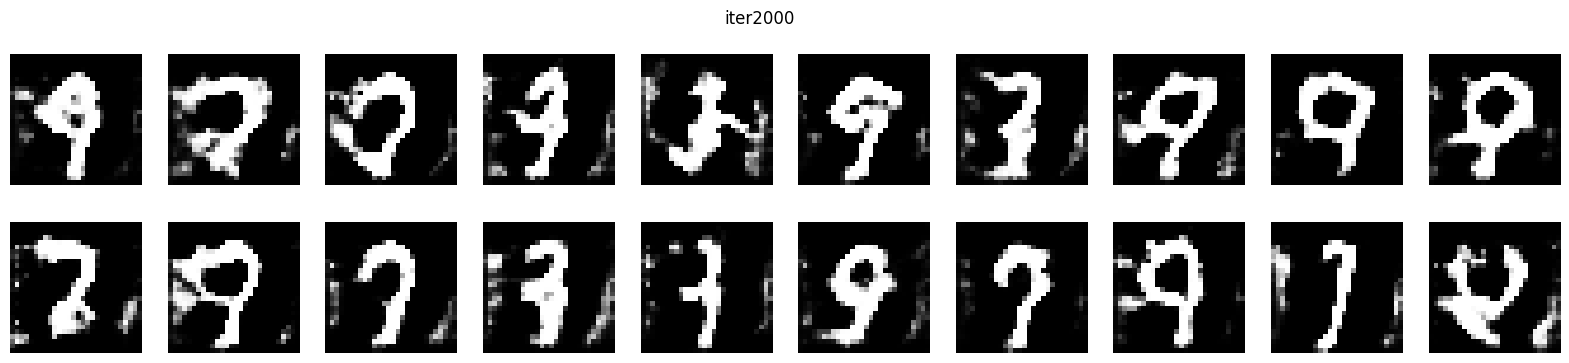

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.43897507
G_loss: 1.0969974
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.4391029
G_loss: 1.0968765
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.43923083
G_loss: 1.0967562
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.439359
G_loss: 1.0966268
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.43948945
G_loss: 1.096494
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.43960914
G_loss: 1.0963738
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.43973383
G_loss: 1.0962446
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.43986356
G_loss: 1.0961177
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.43999493
G_loss: 1.0959791
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.44011977
G_loss: 1.0958527
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.44024387
G_loss: 1.0957279
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.4403661
G_loss: 1.0956186
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/s

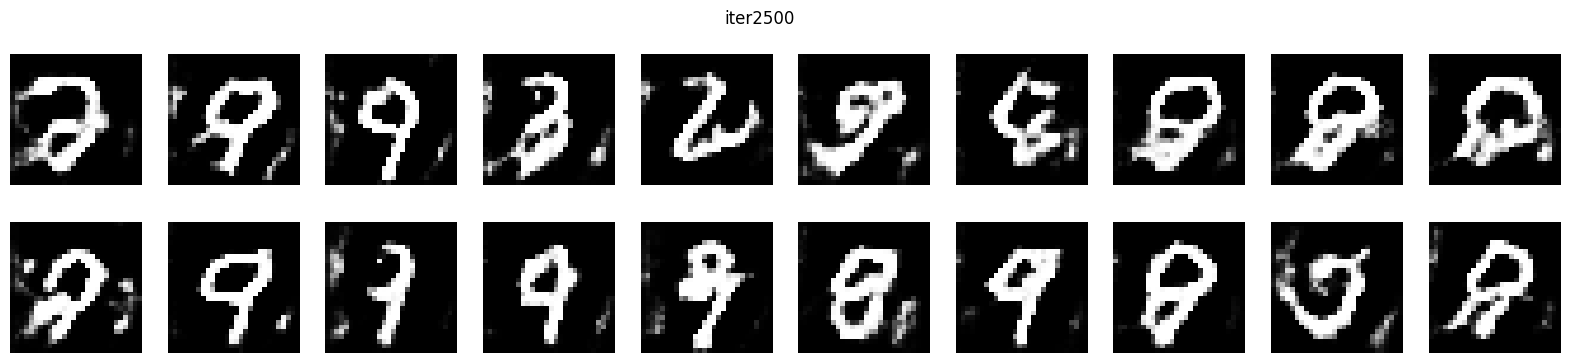

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.49017984
G_loss: 1.0462753
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.490262
G_loss: 1.0461941
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.49033874
G_loss: 1.0461123
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
D_loss(fake): 0.49042246
G_loss: 1.0460249
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.49050352
G_loss: 1.0459509
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.49059066
G_loss: 1.0458734
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.49067378
G_loss: 1.0457915
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.49075785
G_loss: 1.0457095
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.4908354
G_loss: 1.0456243
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.4909136
G_loss: 1.0455354
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.4909927
G_loss: 1.045458
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.49106994
G_loss: 1.0453732
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/st

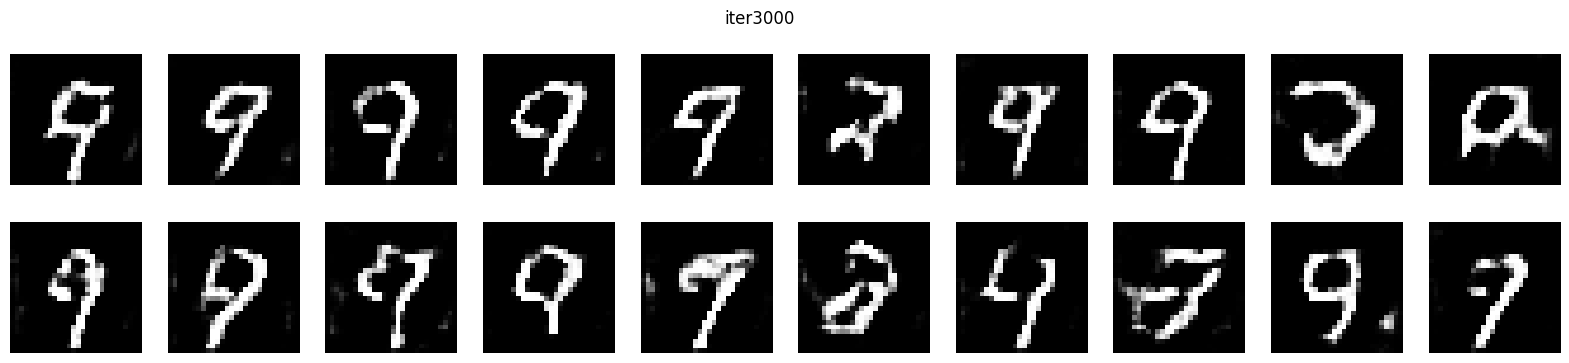

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.52376705
G_loss: 1.0108721
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.52382237
G_loss: 1.0107893
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.52388453
G_loss: 1.0107107
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.52395016
G_loss: 1.0106326
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.5240097
G_loss: 1.0105664
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.5240636
G_loss: 1.0105217
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.5241132
G_loss: 1.010481
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.52416044
G_loss: 1.0104443
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.5242122
G_loss: 1.010398
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.5242701
G_loss: 1.0103409
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.52433276
G_loss: 1.01028
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
D_loss(fake): 0.5243903
G_loss: 1.0102158
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


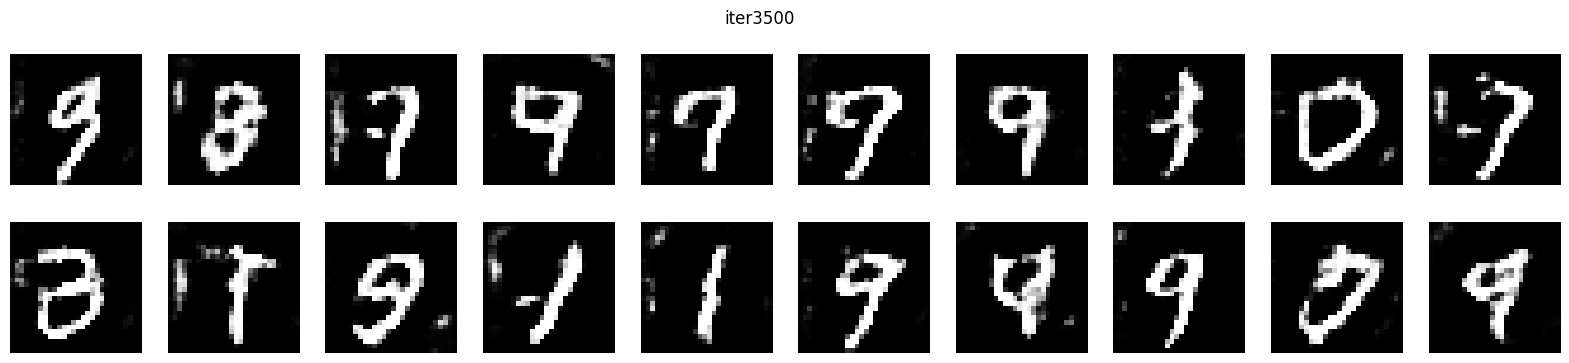

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
D_loss(fake): 0.54756445
G_loss: 0.9852336
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.5476129
G_loss: 0.9851875
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.54765147
G_loss: 0.9851464
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.54768765
G_loss: 0.9851016
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
D_loss(fake): 0.5477273
G_loss: 0.98505783
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
D_loss(fake): 0.5477659
G_loss: 0.98501265
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.5478093
G_loss: 0.9849643
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.54785264
G_loss: 0.9849132
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
D_loss(fake): 0.547898
G_loss: 0.9848635
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
D_loss(fake): 0.5479438
G_loss: 0.9848213
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
D_loss(fake): 0.5479812
G_loss: 0.9847808
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
D_loss(fake): 0.5480169
G_loss: 0.9847501
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/ste

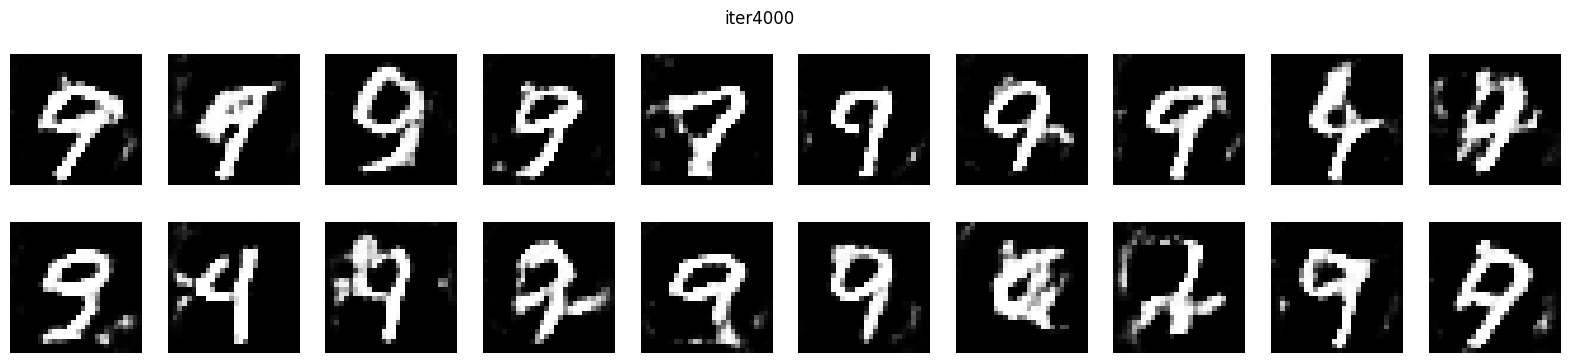

In [17]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print(x_train.shape)


for i in range(iteration+1):
  #for _ in range(2):
  train_discriminator(x_train)
  train_generator()
  if(i%500==0):
    plt.figure(figsize=(20,4))
    plt.suptitle('iter'+str(i))
    for k in range(20):
      plt.subplot(2,10,k+1)
      img = generator.predict(np.random.normal(-1,1,size=(1,noise_dim)))
      ##print("min,max:", img.min(), img.max())
      plt.imshow(img[0,:,:,0],cmap='gray')
      plt.axis('off')
      plt.xticks([])
      plt.yticks([])
    plt.show()


In [ ]:
plt.figure(figsize=(26,12))
plt.suptitle('iter 5000')
for k in range(50):
    plt.subplot(5,10,k+1)
    img = generator.predict(np.random.uniform(-1,1,size=(1,noise_dim)))
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.axis('off')
plt.title(iter)
plt.show()